# Обзор алгоритма

Self-organizing map (SOM) - это специальный тип нейронной сети с обучением без учителя, выполняющий задачу визуализации и кластеризации. Алгоритм по сути сжимает информацию, сохраняя при этом наиболее важные топологические и метрические взаимосвязи исходных данных.

**Архитектура сети:**\
Сеть состоит из двух слоев: входного и выходного (карты признаков).
Сначала выбирается количество нейронов и их координаты, а затем каждому нейрону назначается вектор весов с той же размерностью, что и входное пространство. При этом, в отличие от других типов нейронных сетей, в SOM нейроны не имеют функции активации, т.е. веса напрямую передаютя на выходной слой. Также в SOM используется конкурентное обучение для корректировки весов в нейронах, вместо метода обратного распространения ошибки.

**Входные данные:**\
*d* — размерность признакового пространства\
*n* — количество элементов в наборе данных\
*X(n·d)* — матрица с входными данными\

**Передаваемые гиперпараметры:**\
*m* — количество нейронов\
*T* — количество эпох\
**$\eta$** — скорость обучения (монотонно сходится к 0 по количеству эпох t)\
**$\sigma$** — коэффициент кооперации (монотонно убывает по t)\
**$\gamma$** — коэффициент затухания скорости обучения\
**$\alpha$** — коэффициент  затухания кооперации


\
**Алгоритм:**
1. Инициализируются веса W
2. Каждая эпоха состоит из следующих шагов:\
    • В случайном порядке перебираются элементы исходного датасета\
    • Для каждого выбранного элемента ищутся расстояния от него до векторов весов всех нейронов и определяется ближайший нейрон $M_{c}(t)$ - best matching unit(BMU) - в заданной метрике расстояния (например, евклидово или косинусное расстояние)\
    • Определяются коэффициенты близости $h_{jc}$ всех нейронов к $M_c(t)$\
    • Обновляются веса нейронов по формуле: $w_{j}(t + 1) = w_{j}(t) + \eta · h_{jc} · (x(t) - w_{j}(t))$\
    • Обновляются скорость обучения и коэффициент кооперации по формулам: $\eta = \eta · \gamma$ и $\sigma$ = $\sigma$ · $\alpha$\
    • Вычисляется ошибка карты (например как $\frac{1}{m}\sum _{i=1}^{m}\|x_{i}-w_{c}\|$)
    
   
**Вариации алгоритма**\
• Коэффициент соседства $h$ может задаваться разными способами. Чаще всего для этого используется гауссовская функция: $h_{jc}(t) = exp(-\frac{\|r_{c} - r_{j}\|^2}{2\sigma^2(t)})$, где $r_i$ - координаты нейрона $M_{i}$. Альтернативным вариантом является распределение Коши, при использовании которого больше нейронов будут изменяться на этапе кооперации.\
• Затухания $\gamma$ и $\alpha$ также чаще всего бывают экспоненциальными, однако можно использовать сигмоиду или гауссиану, которые увеличивают количество эпох до затухания.\
• Взаимное расположение нейронов можно подстраивать под данные.\
• SOM поддерживает обучение подвыборками
• Можно прекращать итерации, если значения W не будут меняться на протяжении нескольких эпох или ошибка карты будет незначительной.



**Существующие реализации**\
Наиболее популярные библиотеки с реализацией данного алгоритма: sklearn-som и som-learn. 


**Источники литературы**\
[1]Википедия: Самоорганизующаяся карта Кохонена
https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D0%BC%D0%BE%D0%BE%D1%80%D0%B3%D0%B0%D0%BD%D0%B8%D0%B7%D1%83%D1%8E%D1%89%D0%B0%D1%8F%D1%81%D1%8F_%D0%BA%D0%B0%D1%80%D1%82%D0%B0_%D0%9A%D0%BE%D1%85%D0%BE%D0%BD%D0%B5%D0%BD%D0%B0

[2]The self-organizing map\
https://ieeexplore.ieee.org/abstract/document/58325

[3]Нестандартная кластеризация 4: Self-Organizing Maps, тонкости, улучшения, сравнение с t-SNE\
https://habr.com/ru/post/338868/

[4]The Self-Organizing Maps: Background, Theories, Extensions and Applications\
https://www.researchgate.net/publication/227313166_The_Self-Organizing_Maps_Background_Theories_Extensions_and_Applications

[5]An Introduction to Self-Organizing Maps\
https://www.researchgate.net/publication/263084866_An_Introduction_to_Self-Organizing_Maps


#  BIRCH clustering vs SOM

In [1]:
!pip install sklearn_som -q
!pip install som-learn -q

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://githu

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
df['Serving Size'] = np.vectorize(lambda x: float(x.split(' ')[0]))(df['Serving Size'])

target = df['Category']
target = LabelEncoder().fit_transform(target)

df.drop(columns=['Item', 'Category'], inplace=True)

In [5]:
def calculate_pairs(values: np.array) -> np.array:
    pairs = np.zeros(values.size * (values.size - 1) // 2)
    n = 0
    for i in range(values.size):
        for j in range(i + 1, values.size):
            pairs[n] = (values[i] == values[j])
            n += 1
    return pairs

num_clusters = np.unique(target).size
pairs = calculate_pairs(target)

## BIRCH clustering

In [6]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=num_clusters).fit(df)
preds_birch = brc.predict(df)
pairs_birch = calculate_pairs(preds_birch)

roc_auc = roc_auc_score(pairs, pairs_birch)
print('ROC_AUC:  ', roc_auc)
acc = accuracy_score(pairs, pairs_birch)
print('Accuracy: ', acc)

ROC_AUC:   0.6474194581358113
Accuracy:  0.761954261954262


## DBSCAN clustering

In [7]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=100, min_samples=3).fit(df)
preds_dbscan = clustering.labels_
pairs_dbscan = calculate_pairs(preds_dbscan)

roc_auc = roc_auc_score(pairs, pairs_dbscan)
print('ROC_AUC:  ', roc_auc)
acc = accuracy_score(pairs, pairs_dbscan)
print('Accuracy: ', acc)

ROC_AUC:   0.7705558381035101
Accuracy:  0.7411642411642412


## Agglomerative clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(num_clusters).fit(df)
preds_aggl = clustering.labels_
pairs_aggl = calculate_pairs(preds_aggl)

roc_auc = roc_auc_score(pairs, pairs_aggl)
print('ROC_AUC:  ', roc_auc)
acc = accuracy_score(pairs, pairs_aggl)
print('Accuracy: ', acc)

ROC_AUC:   0.616002078994827
Accuracy:  0.7586278586278586


# SOM with existing libs

## sklearn_som

In [9]:
from sklearn_som.som import SOM

som = SOM(m=3, n=3, dim=22)
som.fit(np.array(df))
preds_som1 = som.predict(df.values)
pairs_som1 = calculate_pairs(preds_som1)

roc_auc = roc_auc_score(pairs, pairs_som1)
print('ROC_AUC:  ', roc_auc)
acc = accuracy_score(pairs, pairs_som1)
print('Accuracy: ', acc)

ROC_AUC:   0.6159110636709607
Accuracy:  0.7650727650727651


## som-learn

In [10]:
from somlearn import SOM

som = SOM(n_columns=3, n_rows=3)
preds_som2 = som.fit_predict(df.values)
pairs_som2 = calculate_pairs(preds_som2)

roc_auc = roc_auc_score(pairs, pairs_som2)
print('ROC_AUC:  ', roc_auc)
acc = accuracy_score(pairs, pairs_som2)
print('Accuracy: ', acc)

ROC_AUC:   0.6019252608336212
Accuracy:  0.7932283932283932


# Visualization

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import animation

In [12]:
pca = PCA(n_components = 2)
pca.fit(df)

print(pca.explained_variance_ratio_)

[0.90928824 0.07127097]


In [13]:
pca_df = pd.DataFrame(pca.transform(df))

preds = pd.DataFrame.from_dict({'SOM_1': preds_som1, 'SOM_2': preds_som2, 'Agglomerative clustering': preds_aggl,
                                'DBSCAN': preds_dbscan, 'Birch': preds_birch, 'real': target})
pca_df = pd.concat([pca_df, preds], axis=1)
pca_df

,0,1,SOM_1,SOM_2,Agglomerative clustering,DBSCAN,Birch,real
0,235.399398,-134.203852,6,5,7,-1,4,2
1,204.763227,-224.173248,6,5,8,0,8,2
2,278.271491,-84.308545,6,5,7,0,4,2
3,411.501471,-2.513249,1,2,7,-1,4,2
4,382.705987,-90.069768,6,5,7,0,4,2
...,...,...,...,...,...,...,...,...
255,-153.708839,215.140926,2,0,0,4,3,7
256,5.016188,359.042090,2,0,0,4,3,7
257,-300.662837,75.293695,5,3,6,4,0,7
258,78.167017,486.624258,2,0,0,-1,3,7


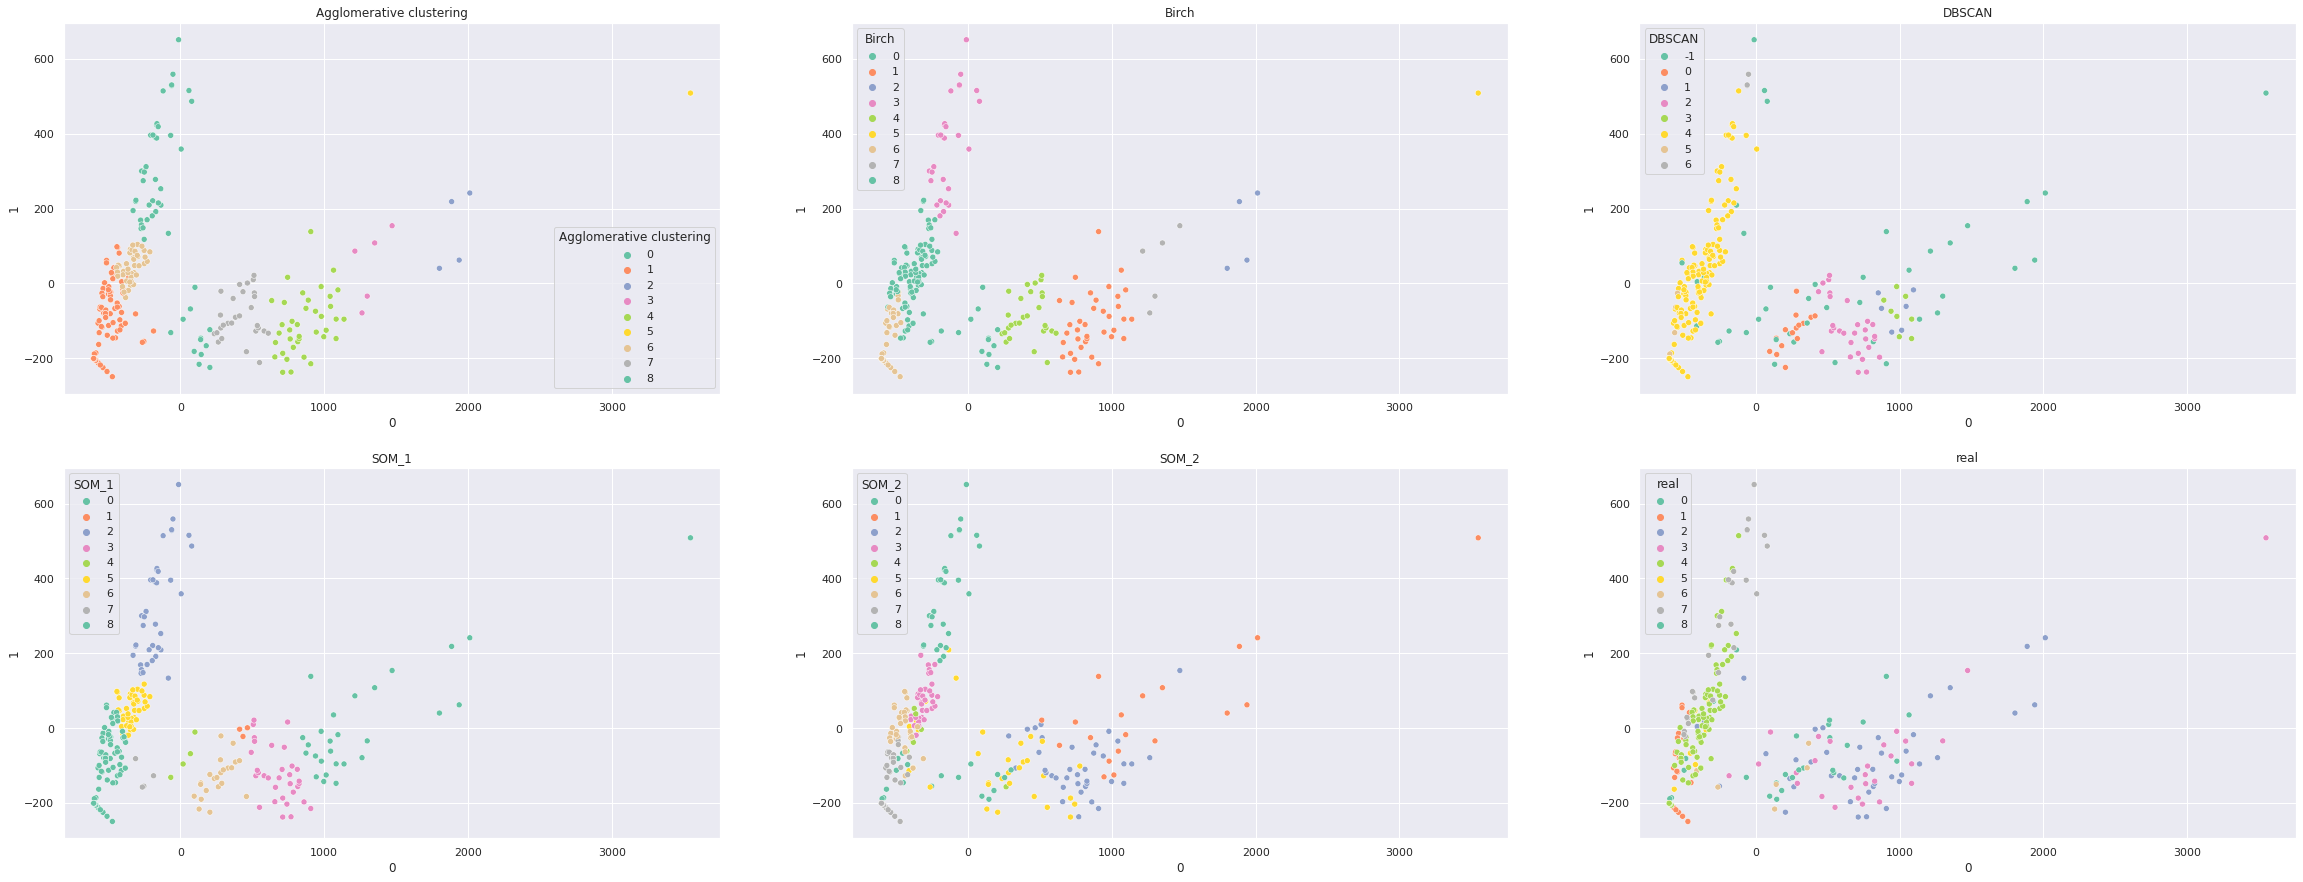

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Agglomerative clustering', 'SOM_2', 'DBSCAN', 'SOM_1', 'Birch', 'real']

fig, axs = plt.subplots(2, 3, figsize=(40, 15))
sns.set_theme(palette="Set2")
for i in range(len(cols)):
  sns.scatterplot(x=pca_df[0], y=pca_df[1], hue=pca_df[cols[i]], palette="Set2", ax=axs[i % 2][i % 3]).set(title=cols[i])